<a href="https://colab.research.google.com/github/bharatbajoria/Summer-Internship/blob/master/Topic_Modelling_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PDF Reading

In [0]:
pip install pyPDF2

In [0]:
import PyPDF2

First section is to read documents PDF files. 
First entry is for Train Data, and then Prediction Data

Taking inputs for training files

In [0]:
#Taking file input for Training Model
#number of files
Number_Train_files=2

file= open('Apr-18.PDF','rb')
file1= open('Apr-17.PDF','rb')
file_list=['Apr-18.PDF','Apr-17.PDF']
x=''

for i in range(Number_Train_files):
  print("\nEnter Train File name")
  #x=input()
  #file_list.append(x)


Enter Train File name

Enter Train File name


Taking inputs for Prediction: File Name

In [0]:
Number_Prediction_files=1
Prediction_files=['Apr-20.PDF']

x=''
for i in range(Number_Prediction_files):
  print("\nEnter Prediction File name")
 # x=input()
 # Prediction_files.append(x)

Prediction_files



Enter Prediction File name


['Apr-20.PDF']

In [0]:
# Reading number of pages
pages=[]

for i in range(Number_Train_files):
  pdfReader = PyPDF2.PdfFileReader(open(file_list[i],'rb'))
  n1=pdfReader.numPages
  pages.append(n1)

In [0]:
# A list containing all files, All_Docs[i] is i-th file 
# All_Docs[i][j] is j-th page of i-th file
All_Docs=[] 

for j in range(len(file_list)):
  pdfReader = PyPDF2.PdfFileReader(open(file_list[j],'rb'))
  file_text=[] #takes string of page text
  for i in range(pages[j]):
    pageObj = pdfReader.getPage(i)
    a=pageObj.extractText()
    file_text.append(a)
  
  All_Docs.append(file_text)

# Finding Optimal number of Clusters

In [0]:
Dup_All_Docs=All_Docs[:]

This section is to figure out optimal number of clusters through silhouette scores

In [0]:
import nltk
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

import pandas as pd
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from nltk.corpus import stopwords
import gensim

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np


In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
en_stop.add('the')#The is not in stopwords

In [0]:
tokens=[]#a list of tokens for input files

for j in All_Docs:
  x=[]
  for i in j:
    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    x.extend(token)
  
  tokens.extend(x)

In [0]:
#2nd Method using Silhouette Score
n=0
ss=0
vectorizer = TfidfVectorizer()
Y = vectorizer.fit_transform(tokens)

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(Y)
    label = kmeans.labels_
    sil_coeff = silhouette_score(Y, label, metric='euclidean')  
    
    if sil_coeff>ss:
      ss=sil_coeff
      n=n_cluster

In [0]:
print("Optimal numbers of clusters are : {}".format(n))

Optimal numbers of clusters are : 10


# LDA LSI HDP

In [0]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import TfidfModel,LdaModel, LsiModel, HdpModel,LdaMulticore,CoherenceModel
from gensim.models.wrappers import LdaMallet
import matplotlib.pyplot as plt

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
dictionary=Dictionary([[i] for i in tokens])
X=[dictionary.doc2bow([sents]) for sents in tokens]#getting bag of words.
tfidf=TfidfModel(X)
X=tfidf[X]

In [0]:
lda=LdaMulticore(X,num_topics=n,id2word=dictionary,workers=8)

In [0]:
lsi=  LsiModel(corpus=X, num_topics=n, id2word=dictionary,)
hdp=  HdpModel(corpus=X, id2word=dictionary)

In [0]:
lsi_words=[topic for topicid, topic in  lsi.show_topics() ]
#lsi_words
hdp_words=[topic for topicid, topic in  lsi.show_topics() ]
#hdp_words

# Evaluating Model: Topic Wise


Data Frames for different Models

In [0]:
#LDA Data Frame

num_words_model=50
ldatopics = [[word for word, prob in topic] for topicid, topic in lda.show_topics(num_words=num_words_model,formatted=False)]
col_lda=[]
a='Topic'
for i in range(len(ldatopics)):
  col_lda.append(a+str(i+1))

topic_df_lda=pd.DataFrame(data=ldatopics,index=col_lda)
topic_df_T_lda=topic_df_lda.T

#LSI Data Frame
lsitopics = [[word for word, prob in topic] for topicid, topic in lsi.show_topics(num_words=num_words_model,formatted=False)]
col_lsi=[]
a='Topic'
for i in range(len(lsitopics)):
  col_lsi.append(a+str(i+1))
  
topic_df_lsi=pd.DataFrame(data=lsitopics,index=col_lsi)
topic_df_T_lsi=topic_df_lsi.T

#HDP Data Frame
hdptopics = [[word for word, prob in topic] for topicid, topic in hdp.show_topics(num_words=num_words_model,formatted=False)]
col_hdp=[]
a='Topic'
for i in range(len(hdptopics)):
  col_hdp.append(a+str(i+1))
topic_df_hdp=pd.DataFrame(data=hdptopics,index=col_hdp)
topic_df_T_hdp=topic_df_hdp.T


In [0]:
topic_df_T_lda.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10
0,sector,cent,inflation,growth,policy,february,per,rate,the,food
1,also,per,impact,outlook,year,risks,prices,expected,headline,prices
2,inflation,the,bank,second,january,monetary,reserve,rising,activity,upside
3,well,march,cpi,prices,march,food,growth,liquidity,domestic,fuel
4,fiscal,monetary,since,target,output,may,effects,increase,global,three


In [0]:
topic_df_T_lsi.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10
0,inflation,the,per,cent,growth,prices,february,policy,food,year
1,monsoon,three,states,growth,cent,stance,there,recent,year,march
2,although,demonetisation,gap,support,ahead,financial,india,risk,index,basis
3,base,index,one,could,banks,around,central,indicators,banks,ahead
4,vegetable,estimates,stance,financial,given,round,statistical,continued,volatility,food


In [0]:
topic_df_T_hdp.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20
0,evidence,borne,dur,exhibited,trigger,steady,inching,rising,spread,forward,pami,quiescent,unrelenting,prefer,uffer,pec,returning,board,turbulence,core
1,sixth,etween,inflation,protein,decided,calls,respect,evaluation,fade,continue,rebound,making,rate,picked,systemic,items,first,seasonality,averse,regular
2,inventories,occur,nino,investors,every,indian,bounced,pursued,needs,constituents,activity,could,south,like,paint,protectionism,fair,dull,confront,indebtedness
3,said,upply,strongly,farther,storm,overwhelm,meanwhile,kept,include,means,pointing,salient,mainly,significant,evenly,timing,month,flagged,deleveraging,takes
4,influence,specifics,chetan,sustaining,plementation,current,domestic,stra,months,budgeted,continue,sustainable,storm,mpanies,serv,mirror,raw,brazil,inso,aes


# Evaluating Words in a Topic : Cosine scores.

In [0]:
#Dup_All_Docs=All_Docs[0]+All_Docs[1]
Dup_All_Docs=[]
for i in All_Docs:
  Dup_All_Docs+=i

df=[]

for j in All_Docs:
  for i in j:
    df.append(i)

from sklearn.feature_extraction.text import CountVectorizer
vectoriser = CountVectorizer().fit(Dup_All_Docs)
X = vectoriser.transform(Dup_All_Docs)
df_vec=pd.DataFrame(X.A, columns=sorted(vectoriser.vocabulary_.keys(), key=lambda k: vectoriser.vocabulary_[k]))

In [0]:
type(df),len(df)# df is a list of strings of all pages in the input files
#created for word tokens

(list, 26)

In [0]:
word_data=[]

for i in df:
    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    word_data.append(token)

In [0]:
model1 = gensim.models.Word2Vec(word_data, min_count = 1,size = 100, window = 5) 

Calculating statistical significance through Cosine Similarity Score

In [0]:

import statistics 
from scipy import stats
from statistics import stdev


def statistical_signficance(topic_df_T,col,alpha,null_hyp):
  #topics_df_T: Dataframe of words for any model
  #col: Mtx with Topic Header, col[i]= Topic-i
  #alpha: Critical p-Value for rejecting null hypothesis
  #null_hyp: Value of mean for Null Hypothesis
  Average_comparison=null_hyp
  ds=[]
  for i in range((len(col))) :
    ds.append(list(topic_df_T[col[i]]))

  ds# ds[i] is i-th list of Topic-i

  simscore_topic=[]#initiating mtx for sim scores/cosine scores


  for p in range(len(ds)):
    k=len(ds[p])
    o=0

    sim=[]
    simt=[]
  
    for i in range(k):
      simt=[]
      for j in range(k)  :
        o=model1.similarity(ds[p][i],ds[p][j])
        simt.append(o)

      sim.append(simt)

    simscore_topic.append(sim)
# 3-D list, simscore_topic[i] is similarity scores for topic-i
# simscore_topic[i][j] is list of similarity score of j-th word in i-th Topic with other words


  
  t_score_all=[]
  p_value_all=[]
  mean=0
  sd=0

  t_value=0
  dup_score=[]
  p=0
  p_value=[]
  t2=0
  for i in range(len(ds)):
    
    t=[]
    p_value_topic=[]
    for j in range(len(ds[i])):         
      dup_score=simscore_topic[i][j][:]    
      dup_score.pop(j)# removing score of i-th element with itself which is=1
      t2,p=stats.ttest_1samp(np.array(dup_score),popmean=np.array(Average_comparison))
      
      t.append(t2)
      p_value_topic.append(p)
      pass

    t_score_all.append(t)
    p_value_all.append(p_value_topic)
  
  t=0
  word_to_remove=[] #initializing tuple to save topicid and word outside cluster
  for i in range(len(p_value_all)):
    word=[]
    for j in range(len(p_value_all)):
      if (p_value_all[i][j]>= alpha) or(t_score_all[i][j]<0):
        word.append(ds[i][j])
    
    if len(word)>0:
      t+=len(word)#counting number of words to be removed
    
    word_to_remove.append(word)


# word_to_remove[i] list of words to remove from topic-i
#ds[i] list of words in topic-i
#t number of words to be removed in a algorithm
# simscore_topic[i][j] is list of similarity score of j-th word in i-th Topic with other words

  
  return word_to_remove,ds,t

Getting Lists of Words removed from each topic

In [0]:
alpha=0.05 
# Statistical significance
null_hyp=0.5
# Ho: Average Score<=null_hyp

#LDA
topic_df_T_lda
col_lda
lda_words_to_remove,lda_words,number_words_removed_lda=statistical_signficance(topic_df_T_lda,col_lda,alpha,null_hyp)
#lda_words_to_remove[i] is list of words to remove from topic-i
#lda_words[i] is list of all words in topic-i
#number_words_removed_lda is no. of words removed from all topics of LDA


#LSI
topic_df_T_lsi
col_lsi
lsi_words_to_remove,lsi_words,number_words_removed_lsi=statistical_signficance(topic_df_T_lsi,col_lsi,alpha,null_hyp)


#HDP
topic_df_T_hdp
col_hdp
hdp_words_to_remove,hdp_words,number_words_removed_hdp=statistical_signficance(topic_df_T_hdp,col_hdp,alpha,null_hyp)

words_removed=[number_words_removed_lsi, number_words_removed_hdp, number_words_removed_lda]

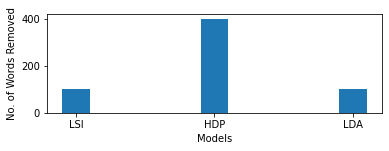

In [0]:
def evaluate_bar_graph(coherences, indices):
    plt.subplot(2,1,1)
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('No. of Words Removed')

    


evaluate_bar_graph([number_words_removed_lsi, number_words_removed_hdp, number_words_removed_lda],
                   ['LSI', 'HDP', 'LDA'])


#**Adding New File**

In [0]:
#new_doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=new_bow)])
#https://www.kaggle.com/ktattan/lda-and-document-similarity

def new_file_prediction(Prediction_file_name,dictionary,lda1):
  #Prediction_file_name: Name of file for pulling out data, should be PDF only
  #dictionary: Dictionary on which model has been trained
  #lda1: Best Prediction Model

  Prediction_file_name=Prediction_file_name
  new_file=open(Prediction_file_name,'rb')
  pdfReader = PyPDF2.PdfFileReader(new_file)
  n1=pdfReader.numPages

  new_file_pg=[]
  for i in range(n1):
    pageObj = pdfReader.getPage(i)
    a=pageObj.extractText()
    new_file_pg.append(a)

#Creating tokens of new file
  new_token=[]
  x=[]
  for i in new_file_pg:

    token=tokenizer.tokenize(i)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    x.extend(token)
  
    new_token.extend(x)


  Z=[dictionary.doc2bow([sents]) for sents in new_token]#Obtaining bag of words of new file

  newlda=lda1[Z]
  #newlda_topics=[[(word,prob) for word, prob in topic] for topicid, topic in newlda.show_topics(formatted=False)]
  newlda
  #dictionary_LDA

  new_topic=lda1[dictionary.doc2bow(new_token)]
  New_Topic_id,New_Topic_Prob= [],[]
  a='Topic '
  for i in new_topic:
    a=str(i[0]+1)
    New_Topic_id.append(a)
    New_Topic_Prob.append((i[1]*100))

  return New_Topic_id,New_Topic_Prob

Ideal Model is : LdaModel(num_terms=2065, num_topics=10, decay=0.5, chunksize=2000)





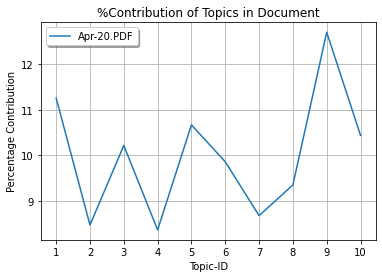

In [0]:
#Number_Prediction_files=1
#Prediction_files=

Best_model=[number_words_removed_lsi, number_words_removed_hdp, number_words_removed_lda]
model=[lsi_words, hdp_words, lda_words]

k=2
ideal_model=lda

if min(Best_model)==number_words_removed_lda:
  k=0
  ideal_model=lda1
if min(Best_model)==number_words_removed_hdp:
  k=1
  ideal_model=hdp

New_Topic_id_alldocs,New_Topic_Prob_alldocs=[],[]


for i in range(Number_Prediction_files):
  New_Topic_id,New_Topic_Prob=new_file_prediction(Prediction_files[0],dictionary,ideal_model)
  New_Topic_Prob_alldocs.append(New_Topic_Prob)

print("Ideal Model is :",ideal_model)
print("\n\n")
plt.xlabel("Topic-ID")
plt.ylabel("Percentage Contribution")
plt.title("%Contribution of Topics in Document")
for i in range(Number_Prediction_files):
  plt.plot(New_Topic_id,New_Topic_Prob,label=Prediction_files[i])

plt.legend(loc='best',shadow=True)
plt.grid()

# Word cloud-for Best Model

In [0]:
from wordcloud import WordCloud,STOPWORDS
import os
from PIL import Image

In [0]:

Best_model=[number_words_removed_lsi, number_words_removed_hdp, number_words_removed_lda]
model=[lsi_words, hdp_words, lda_words]
model_words_removed=[lsi_words_to_remove,hdp_words_to_remove,lda_words_to_remove]

k=2

if min(Best_model)==number_words_removed_lsi:
  k=0
if min(Best_model)==number_words_removed_hdp:
  k=1
if min(Best_model)==number_words_removed_lda:
  k=2

#Best Model selected through least number of words removed


words_joined=[]# lda_words_joined[i] string of Topic-i words
j=''
z=[]
for i in range(len(model[k])):
  z= model[k][i]
  #print("\n",z)
  z= [j for j in z if not(j in model_words_removed[k][i] or j in en_stop)]
  #print("\n",z)
  j=''
  j=" ".join(z)+" "
  words_joined.append(j)
  

# Automatic topic labelling

In [0]:
dup_model=model1

In [0]:
pip install wordcloud wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=0f426871c803b4c295900bedfd6b343d92f2ad587572ee4fcc185e1a9937609c
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [0]:
import wikipedia

In [0]:
words_joined# list of string of words, words_joined[0] is a string of words from topic-1

['production cent demonetisation system keep pricing policy point basis index real growth rates oil closing private support section spending house macroeconomic recovery softening committee procurement trajectory export reflected measured power traffic slowdown lending seasonal reverse equity gains year impact level ',
 'risks survey ahead remains cpi services positive high continued time external medium credit next various momentum hra first view rbi gas union excluding sectors return non banks mumbai monthly member mode main war line strengthening increase index adopted expanded research ',
 'months one stance excluding industrial april vote estimates sub set non foreign michael leading large sales prices policy mpc effects economic services january committee time two concerns macroeconomic improvement indicating remain probability peak shock sheets output domestic volatility released ',
 'given capital trade financial resolution states inflation period base higher india exports corp

In [0]:
# taking top-10 words from a topic to get wikipedia articles
import random

topic_number=5 # 0 4 8 1
# 0- sensible topic value
word_limit=15


x= words_joined[topic_number]
x=x.split(" ")
x=x[:word_limit]
a='driven'

if a in x:
  x.remove(a)

content=[]
title_vector=[]
index_topic=[]
#ndex_topic[0][1] # index_topic[i] is a list of titles obtained for word-1
## index_topic[i][j] is a list of words in j-th title obtained for word-1
len(index_topic)
for j in x:
  content=[]
  index_word=[]
  file_title=wikipedia.search(j,results=10,suggestion= True)
  print("\n\nTitle for word :", j)
  print(file_title[0])
  for l in range(len(file_title[0])):
    #print("\n Inside loop",file_title[0][l])
    try:
      y = wikipedia.search(file_title[0][l])[2]
      y = wikipedia.page(y)
    except wikipedia.DisambiguationError as e:
      s = random.choice(e.options[0])
      y = wikipedia.page(s)

     
    token=tokenizer.tokenize(y.content)
    token=[i for i in token if(not(str(i).isdigit() or not(str(i).isalpha())) and len(str(i)) > 2 )]
    token=[i.lower() for i in token if( i not in en_stop)]
    content.append(token)

  
  #print("\n content",len(content))  
  dup_model.build_vocab(content,update= True)#content is a 2-d list
  dup_model.train(content, total_examples=len(content),epochs=2)
  for i in range(len(file_title[0])):
    
    #y=y.replace(file_title[0][i],"")
    y= file_title[0][i].lower()
    z=y.split()
    for m in range(len(z)):
      index=[]
      p=list(z[m])
      for k in range(len(p)):
        if (p[k]=="-" or p[k]==","):
          p[k]=" "

        if not(p[k].isalpha()):
          index.append(k)
      for k in range(len(index)):
        p.pop(index[len(index)-k-1])
      
      k=''
      for w in p:
        k+=w
      z[m]=k

    z=[k for k in z if not(k in en_stop or k== j or k=="" or k==",")]
    
    print(z)
    index_word.append(z)
    dup_model.build_vocab(index_word,update= True)
    dup_model.train(index_word, total_examples=len(content),epochs=2)
  
    
  index_topic.append(index_word)



Title for word : moderated
['Moderation', 'Moderate', 'Graphite-moderated reactor', 'Moderated mediation', 'RBMK', 'Moderate Party', 'Moderate realism', 'Mediation (statistics)', 'Nuclear reactor core', 'Keith Ellison']



The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.
 [wikipedia.py:389]


['moderation']
['moderate']
['graphitemoderated', 'reactor']
['mediation']
['rbmk']
['moderate', 'party']
['moderate', 'realism']
['mediation', 'statistics']
['nuclear', 'reactor', 'core']
['keith', 'ellison']


Title for word : central
['Central', 'Central America', 'Central Park', 'Comedy Central', 'Central Europe', 'Central Park jogger case', 'Central bank', 'Centrality', 'Central sulcus', 'Central Australia']
[]
['america']
['park']
['comedy']
['europe']
['park', 'jogger', 'case']
['bank']
['centrality']
['sulcus']
['australia']


Title for word : even
['Even', 'Even Stevens', 'Even-toed ungulate', 'Even If', 'Break-even', 'Even Hotels', 'Even Yehuda', 'Break-even (economics)', 'Even Flow', 'List of Even Stevens episodes']
[]
['stevens']
['eventoed', 'ungulate']
[]
['breakeven']
['hotels']
['yehuda']
['breakeven', 'economics']
['flow']
['list', 'stevens', 'episodes']


Title for word : rent
['Rent (musical)', 'Rent', 'Rent (film)', 'Renting', 'Rent-seeking', 'Economic rent', 'Rent 

PageError: ignored

In [0]:
#index_topic[0][1] # index_topic[i] is a list of titles obtained for word-1
## index_topic[i][j] is a list of words in j-th title obtained for word-1
len(index_topic),len(lda_words)

In [0]:
max_score=0
max_list=[]
for i in range(len(index_topic)):
  o=0
  for j in range(len(index_topic[i])):
    o=0
    for k in range(len(index_topic[i][j])):
      for p in range(len(x)):
        o+=dup_model.similarity(index_topic[i][j][k],x[p])
    if len(index_topic[i][j])>0:
      o= o/len(index_topic[i][j])
    if o>max_score:
      max_score=o
      max_list=[i,j]
max_list

In [0]:
x,index_topic[max_list[0]][max_list[1]]

file_title=wikipedia.search(x[max_list[0]],results=10,suggestion= False)
file_title[max_list[1]],x

In [0]:
# 0(0),1(1),3(2), 4(2), 5(2), 8(0)
#0 - Materialized View
#1- Sea level
#2- Change Management
#3 - PMI Change or Export
#4(2)- Bank Vault
#5 - Brent Crude
#6(2):- Commodity Money
#7(1) :- Since you been gone
#8(0) :- Fiscal Agent


In [0]:
x=['Materialized View','Sea level','Change Management','PMI Change or Export','Bank Vault','Brent Crude',"Attributable risk",'Reserve Currency','Fiscal Agent']

for i in range(len(words_joined)):
  print("\n\nTopic-",i+1," ", x[i])
  wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = STOPWORDS,
                min_font_size = 10,
                max_words=30                
                ).generate(words_joined[i]) 
  
# plot the WordCloud image                        
  #plt.subplots(1,2,sharey= 'row')
  plt.figure(figsize = (4, 6), facecolor = None,edgecolor='black') 
  y=plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show( )
  x.append(y)